<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/CS478_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Generate sine wave dataset
num_samples = 1000
x = np.linspace(0, 100, num_samples)
y = np.sin(x)

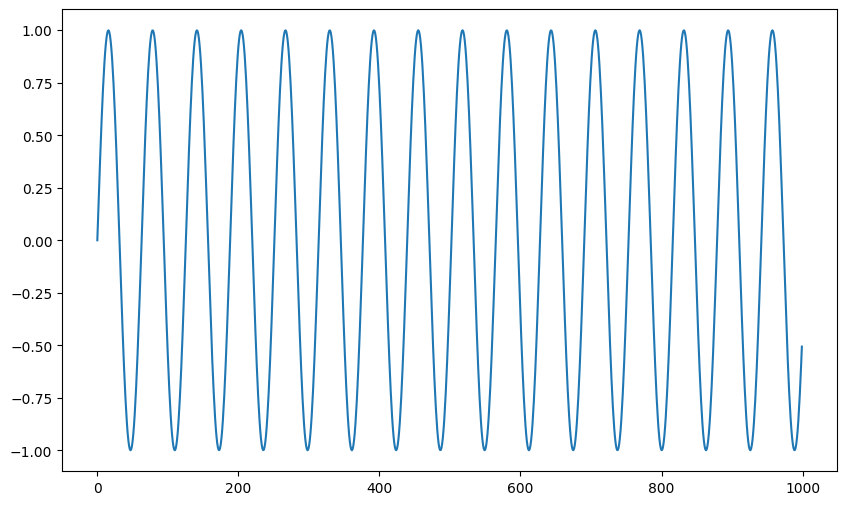

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.show()


Input shape: (950, 50)
Output shape: (950,)


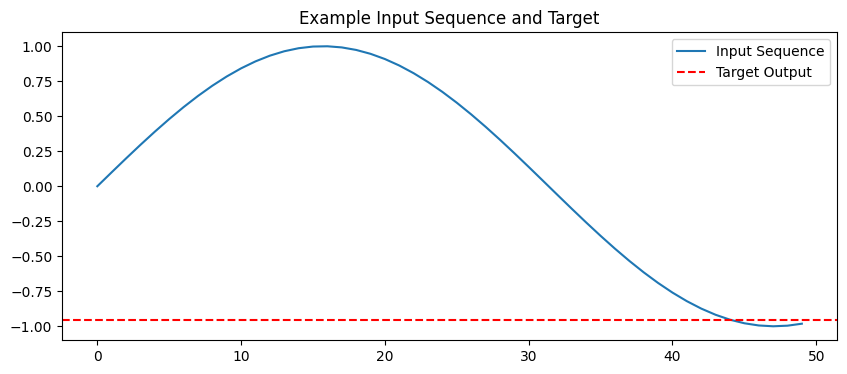

In [26]:
#TASK 1
sequence_length = 50
X, Y = [], []
for i in range(len(y) - sequence_length):
    X.append(y[i:i + sequence_length])
    Y.append(y[i + sequence_length])

X = np.array(X)
Y = np.array(Y)
print("Input shape:", X.shape)  # (950, 50)
print("Output shape:", Y.shape) # (950,)

plt.figure(figsize=(10, 4))
plt.plot(X[0], label='Input Sequence')
plt.axhline(y=Y[0], color='r', linestyle='--', label='Target Output')
plt.legend()
plt.title("Example Input Sequence and Target")
plt.show()



Training with activation: linear

Training with activation: tanh

Training with activation: relu


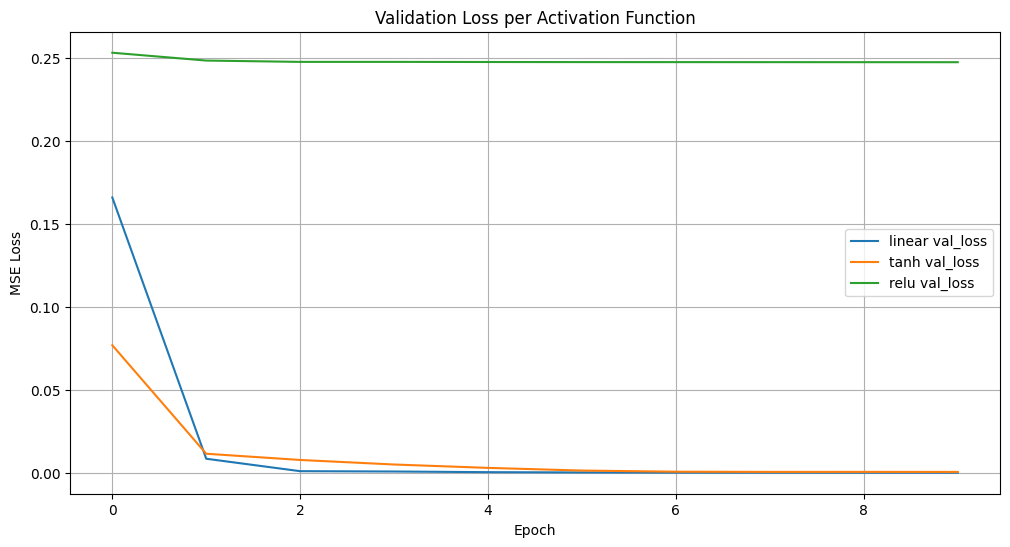

In [27]:
#TASK 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

X = X.reshape((X.shape[0], X.shape[1], 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def build_model(activation='linear'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(sequence_length, 1)))
    model.add(Dense(1, activation=activation))
    model.compile(optimizer='adam', loss='mse')
    return model

activations = ['linear', 'tanh', 'relu']
histories = {}
for act in activations:
    print(f"\nTraining with activation: {act}")
    model = build_model(activation=act)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=32,
                        validation_data=(X_test, Y_test), verbose=0)
    histories[act] = history

plt.figure(figsize=(12, 6))
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act} val_loss')
plt.title("Validation Loss per Activation Function")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1707 - val_loss: 0.0322
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0164 - val_loss: 0.0011
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 5.1833e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6968e-04 - val_loss: 2.7124e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6750e-04 - val_loss: 2.2113e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9697e-04 - val_loss: 1.5893e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3997e-04 - val_loss: 1.2347e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0236e-04 - val_loss: 8.1550e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0464e-05 - val_loss: 5.6829e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5981e-05 - val_loss: 3.4738e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6868e-05 - val_loss: 2.0294e-05
Ep

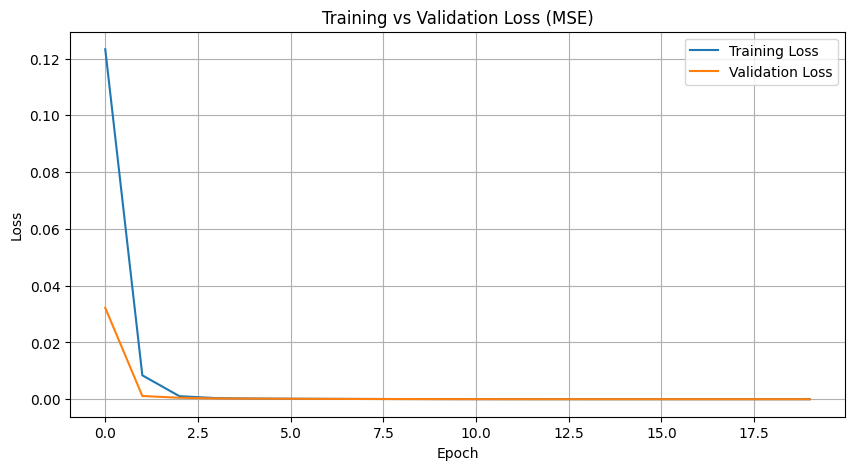

In [28]:
#TASK 3
model = build_model(activation='linear')
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1
)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Test MSE Loss: 0.00000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


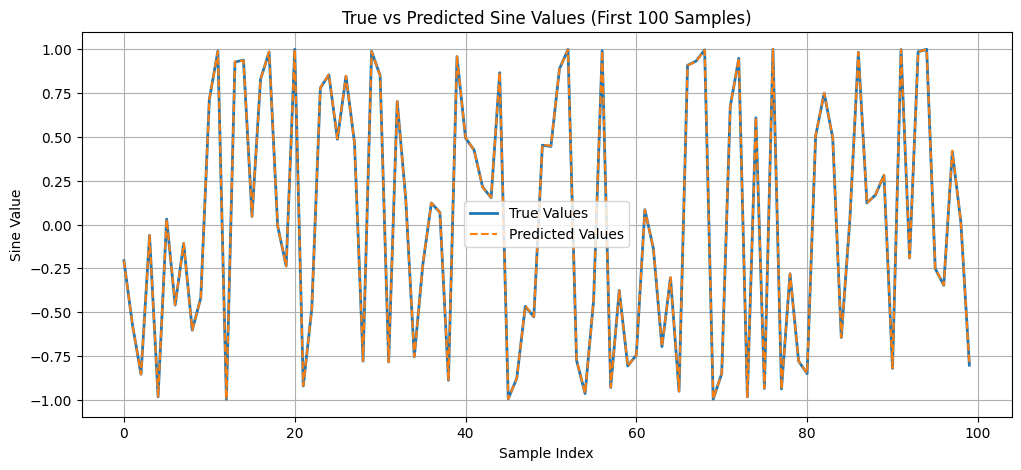

In [29]:
#TASK 4
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE Loss: {test_loss:.5f}")

Y_pred = model.predict(X_test)

plt.figure(figsize=(12, 5))
plt.plot(Y_test[:100], label='True Values', linewidth=2)
plt.plot(Y_pred[:100], label='Predicted Values', linestyle='--')
plt.title("True vs Predicted Sine Values (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sine Value")
plt.legend()
plt.grid(True)
plt.show()
